In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

<h1>Explore data</h1>

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [6]:
df_train.replace('?', np.nan, inplace = True)
df_train.replace('Not Mapped', np.nan, inplace = True)

In [7]:
#Get the amount of empty values
df_train.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3920
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     3269
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_dia

In [8]:
df_train[df_train['primary_diagnosis'] == 'NaN']

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass


In [9]:
df_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [10]:
df_train['country'].unique().sum()
#there is only one country, so we will drop the country column
df_train = df_train.drop('country', axis=1)

In [11]:
df_train.head(2)

,encounter_id,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No


In [12]:
df_train['admission_source'].value_counts()
#should not available be NaN?
df_train['length_of_stay_in_hospital'].value_counts() #change to ranges? 
df_train['number_lab_tests'].value_counts() #create ranges 
df_train['non_lab_procedures'].value_counts()
df_train['number_of_medications'].value_counts() #ranges?
df_train['number_diagnoses'].isna().sum()

0

In [13]:
#making target variable numerical
df_train['readmitted_binary'] = df_train['readmitted_binary'].replace({'Yes': 1, 'No': 0}).astype(int)
#binary encoding of gender
df_train['gender'] = df_train['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)

#one hot encoding for race
encoder_race = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_race.fit_transform(df_train['race'].values.reshape(-1, 1))

#concatenate the one-hot encoded df with df_test
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_race.get_feature_names_out(['race']))], axis=1)

In [14]:
df_train

,encounter_id,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan
0,533253,70110,Caucasian,1.0,[70-80),NaN,NaN,0,0,2,...,No,No,[],0,>30 days,0.0,1.0,0.0,0.0,0.0
1,426224,29775006,AfricanAmerican,0.0,[50-60),NaN,NaN,0,0,0,...,No,Yes,['insulin'],0,No,0.0,0.0,0.0,0.0,0.0
2,634063,80729253,Caucasian,1.0,[60-70),NaN,NaN,0,0,1,...,Ch,Yes,"['glimepiride', 'insulin']",0,No,0.0,1.0,0.0,0.0,0.0
3,890610,2919042,AfricanAmerican,0.0,[60-70),NaN,MC,0,0,1,...,No,No,[],0,No,0.0,0.0,0.0,0.0,0.0
4,654194,84871971,Caucasian,1.0,[70-80),NaN,HM,1,0,0,...,No,No,[],0,>30 days,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,24531381,AfricanAmerican,1.0,[80-90),NaN,MC,0,1,0,...,Ch,Yes,"['metformin', 'glyburide', 'insulin']",0,No,0.0,0.0,0.0,0.0,0.0
71232,826429,4663818,AfricanAmerican,1.0,[70-80),NaN,NaN,0,0,0,...,Ch,Yes,"['metformin', 'glyburide']",0,No,0.0,0.0,0.0,0.0,0.0
71233,332030,23397147,Caucasian,1.0,[60-70),NaN,NaN,0,2,2,...,Ch,Yes,"['glyburide', 'insulin']",1,<30 days,0.0,1.0,0.0,0.0,0.0
71234,757560,52161750,Caucasian,0.0,[60-70),NaN,BC,0,0,2,...,Ch,Yes,"['glyburide', 'insulin']",0,No,0.0,1.0,0.0,0.0,0.0


In [15]:
#one hot encoding for payer_code
encoder_payer_code = OneHotEncoder(sparse_output= False, drop='first')
one_hot_encoded = encoder_payer_code.fit_transform(df_train['payer_code'].values.reshape(-1,1))

df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis = 1)

In [16]:
df_train['medical_specialty'].isna

<bound method Series.isna of 0        Family/GeneralPractice
1                           NaN
2        Family/GeneralPractice
3              InternalMedicine
4                           NaN
                  ...          
71231          InternalMedicine
71232                       NaN
71233                       NaN
71234          Emergency/Trauma
71235           Surgery-General
Name: medical_specialty, Length: 71236, dtype: object>

In [17]:
df_train['medical_specialty'].value_counts()

InternalMedicine                 10292
Emergency/Trauma                  5319
Family/GeneralPractice            5217
Cardiology                        3716
Surgery-General                   2144
                                 ...  
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Proctology                           1
Pediatrics-EmergencyMedicine         1
Neurophysiology                      1
Name: medical_specialty, Length: 68, dtype: int64

In [18]:
df_train[df_train['medical_specialty'].isna()].sum()

/var/folders/4k/ys8fs3nd6b17yqv4_43r0tdh0000gn/T/ipykernel_6087/2426084642.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train[df_train['medical_specialty'].isna()].sum()


encounter_id                                                                   19078052029
patient_id                                                                   2131433410796
gender                                                                             18665.0
outpatient_visits_in_previous_year                                                   17272
emergency_visits_in_previous_year                                                     6570
inpatient_visits_in_previous_year                                                    22460
medical_specialty                                                                        0
average_pulse_bpm                                                                  3478317
length_of_stay_in_hospital                                                          153942
number_lab_tests                                                                   1509999
non_lab_procedures                                                                   43263

In [19]:
cnt = df_train[['encounter_id','medical_specialty']].groupby(by = 'medical_specialty').count().sort_values(by = 'encounter_id', ascending=False).head(50)
mean = df_train[['readmitted_binary','medical_specialty']].groupby(by = 'medical_specialty').mean().sort_values(by = 'readmitted_binary', ascending=False).head(50)
pd.concat([cnt, mean], axis = 1)
 #readmitted binary has a mean of 0.133323
#variables far from the mean - Cardiology, Orthopedics-Reconstructive, Radiologist, urology, ObstetricsandGynecology, Surgery-Cardiovascular/Thoracic	
#Surgery-Neuro, PhysicalMedicineandRehabilitation, 

mean

,readmitted_binary
medical_specialty,
AllergyandImmunology,0.500000
Resident,0.500000
Pediatrics-Hematology-Oncology,0.250000
Hematology,0.207547
Hematology/Oncology,0.202614
Endocrinology-Metabolism,0.200000
Cardiology-Pediatric,0.200000
Oncology,0.189300
Rheumatology,0.187500


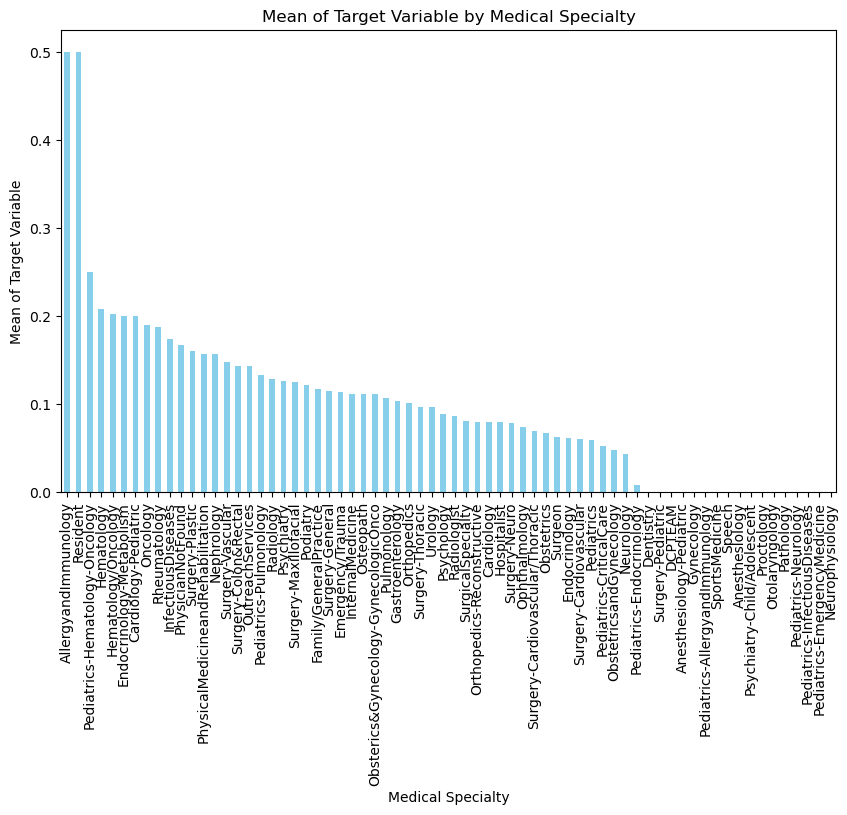

In [20]:
grouped_data = df_train.groupby('medical_specialty')['readmitted_binary'].mean()

import matplotlib.pyplot as plt

# Sort specialties based on mean values
sorted_data = grouped_data.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='bar', color='skyblue')
plt.title('Mean of Target Variable by Medical Specialty')
plt.ylabel('Mean of Target Variable')
plt.xlabel('Medical Specialty')
plt.show()

